<a href="https://colab.research.google.com/github/akshayanant/digitalimageprocessing/blob/master/ImageProc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

In [0]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [0]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [0]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


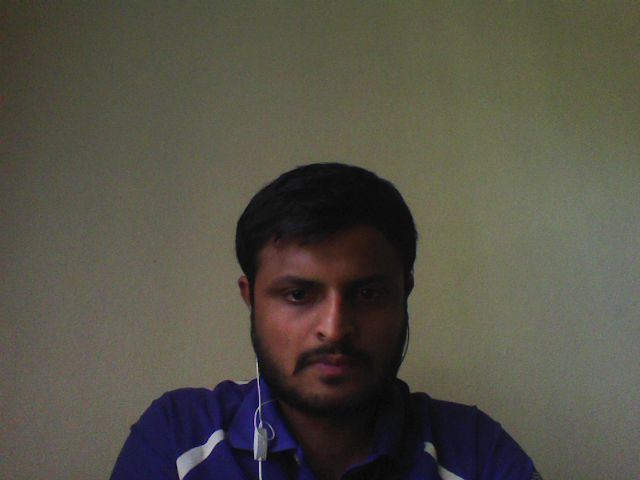

In [0]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

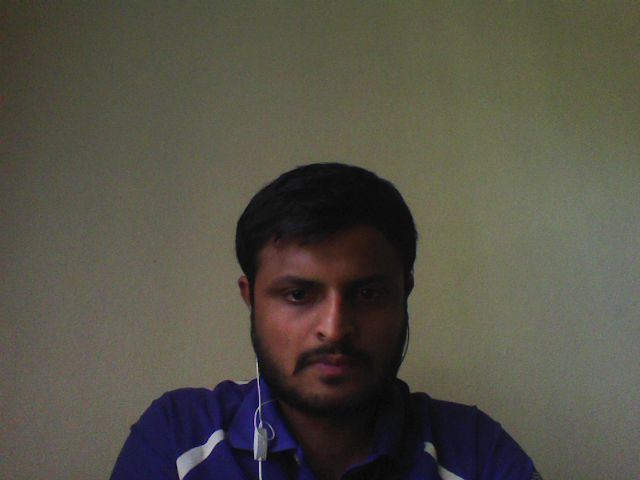

In [0]:
img = cv2.imread('photo.jpg')
cv2_imshow(img)


In [0]:
print(img)

[[[ 37  56  61]
  [ 36  55  60]
  [ 36  53  56]
  ...
  [ 54  88  87]
  [ 54  91  89]
  [ 55  92  90]]

 [[ 36  55  60]
  [ 36  55  60]
  [ 36  53  56]
  ...
  [ 56  90  89]
  [ 57  91  90]
  [ 54  91  89]]

 [[ 35  54  57]
  [ 35  54  57]
  [ 37  54  57]
  ...
  [ 56  90  89]
  [ 54  88  87]
  [ 52  86  85]]

 ...

 [[ 69  85  84]
  [ 69  85  84]
  [ 73  86  88]
  ...
  [ 91  84  99]
  [ 96  86 103]
  [ 98  88 105]]

 [[ 67  86  83]
  [ 68  84  83]
  [ 72  85  87]
  ...
  [ 95  85 101]
  [ 99  87 105]
  [101  89 109]]

 [[ 62  81  78]
  [ 61  79  78]
  [ 66  79  81]
  ...
  [ 91  81  97]
  [ 95  81  99]
  [ 96  81 102]]]


In [0]:
img.shape

(480, 640, 3)

In [0]:
img1gray = img.sum(-1)

In [0]:
img1gray.shape

(480, 640)

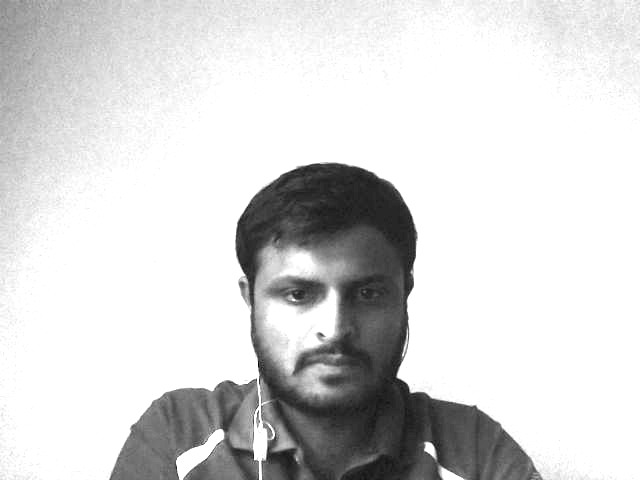

In [0]:
cv2_imshow(img1gray)


In [0]:
selfie = cv2.imread('/content/20190810_104938.jpg')

In [0]:
selfie.shape

(2560, 1440, 3)

In [0]:
def to_bnw(colorimage):
  bnw = colorimage.max(-1)
  return bnw

In [0]:
def process_image(colorimage):
  bnw = to_bnw(colorimage)
  return bnw
  

In [0]:
img_proc = process_image(selfie)

In [0]:
cv2.imwrite('Image_Proc.jpeg',img_proc)

True